*SMTB-2021 :: "A Practical Intro to Probability Theory."*
*a@bochkarev.io*

**Last time we discussed independence, tests, and Co.:**
- Crocodiles and rabbits revised (aka black and white balls).
- Dependent and Independent events.
- Conditional probability.
- COVID test as a random variable. Characterizing tests.

**This time, we start...**

## Topic 3: Random Variables
   - Definition
   - Quick examples: score on dice; an RV with countably many values (Poisson)
   - Bernoulli scheme (a "biased" coin) and Binomial distribution (counting the number of "Heads").
   - Characterizing RVs: PMF, CDF.

In [1]:
import numpy as np
from scipy.special import comb
import seaborn as sns
import matplotlib.pyplot as plt
from math import factorial, exp, pi, sqrt

## Random events → random *variables*
We have defined "Probability Space" $(\Omega, \mathcal{F}, \mathbb{P})$. However, often we are interested in some random *values*, and not exactly the structure of the set of outcomes. We can try to define something like:

**A random variable** -- is a function $\xi: \Omega \rightarrow \mathbb{R}$. 

In particular, it must satisfy the condition that for any "reasonable" (sic!) subset $B\subseteq \mathbb{R}$ (we can say "any interval $(a,b)$") it must be technically possible to calculate $\mathbb{P}(\xi \in B)$, that is, $\xi^{-1}(B) \in \mathcal{F}$ -- is an "event.

**How to describe random variables?**

- for a *discrete* case we often discuss "probability mass function" (PMF): $\mathbb{P}(\xi=x_i)=p_i$ for all $i$.

*(we'll try to discuss another case further)*

- sometimes we discuss "cumulative probability density" (CDF), which is just $F(x):=\mathbb{O}(\xi\leq x)$. (We'll soon see why)

### Some examples
- Assume $\Omega=\{⚀, ⚁, ⚂, ⚃, ⚄, ⚅\}$ -- our experiment with dice. We can introduce $\xi(\omega)$ as the *score* we got. E.g.,  $\xi(⚄) := 5$, and os on.

- What if I want to describe random numbers from 1 to 100? (e.g., school test results) 

I would need to define $p_1,\ldots, p_{100}$ (*so that **what**?*) and assume $\mathbb{P}(\xi=x)=0$ for any $x\notin \{1,\ldots,100\}$.

In Python one can get such random numbers, e.g., with `numpy` library (although where to find *randomness* inside a computer is a separate, totally exciting topic):

In [5]:
np.random.randint(0,101)

5

- Hmmm... what if I want to get **any** random integers (albeit non-uniformly)? 1,2,5,345,... Is it possible?

    * Well, "how many" are those?

    * Can the probability at each point be bounded below? What are restrictions on $\mathbb{P}$?..
    * does all this create any trouble to us?

OK, let's consider an example:

$$\mathbb{P}(\xi=x) := \frac{10^x}{x!}e^{-10},\quad x=1,2,3\ldots\nonumber$$

How interesting:

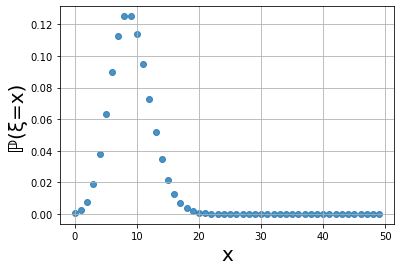

In [25]:
def show_p(p_func, N = 50, N0=1):
    p = [0.0] * N

    for x in range(N0, N):
        p[x - N0] = p_func(x)
    
    sns.regplot([x for x in range(N)],p, fit_reg=False)
    plt.grid()
    plt.xlabel("x", fontsize=20); plt.ylabel("ℙ(ξ=x)", fontsize=20);
    return p

p=show_p(p_func = lambda x: (10**x / factorial(x))*exp(-10))

In [15]:
p[-5:]

[8.250599158717311e-17,
 1.7554466295143215e-17,
 3.6571804781548364e-18,
 7.463633628887421e-19,
 1.4927267257774841e-19]

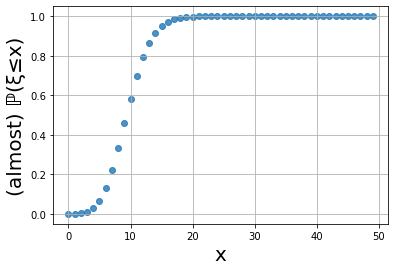

In [26]:
# Moreover!
def show_cumulative_p(p_func, p0, N = 50):
    p_cumulative = [0.0] * N

    p_cumulative[0] = p0

    for x in range(1, N):
        p_cumulative[x] = p_cumulative[x-1] + p_func(x)
    
    sns.regplot([x for x in range(N)],p_cumulative, fit_reg=False)
    plt.grid()
    plt.xlabel("x", fontsize=20); plt.ylabel("(almost) ℙ(ξ≤x)", 
                                             fontsize=20);
    return p_cumulative

p_cumulative=show_cumulative_p(p_func=lambda x: (10**x / factorial(x))*exp(-10), p0=exp(-10))

In [20]:
p_cumulative[-5:]

[0.9999999999999998,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999]

## Example: Bernoulli scheme and Binomial distribution

- Let's throw a *biased* coin (prob. of "success" $p$), $n$ times
- We can try to answer different questions. E.g., what's the probability that the first "success" will happen on $t$-th time?

Well, of course, $(1-p)^{t-1}p$.

- now, let's calculate the *number* of successes. This will be our $\xi$.

What is $\mathbb{P}(\xi = k)$, and why?

$$\mathbb{P}(\xi=k) = C_n^k p^k (1-p)^{n-k}\nonumber,$$

and this is called "Binomial" distribution.

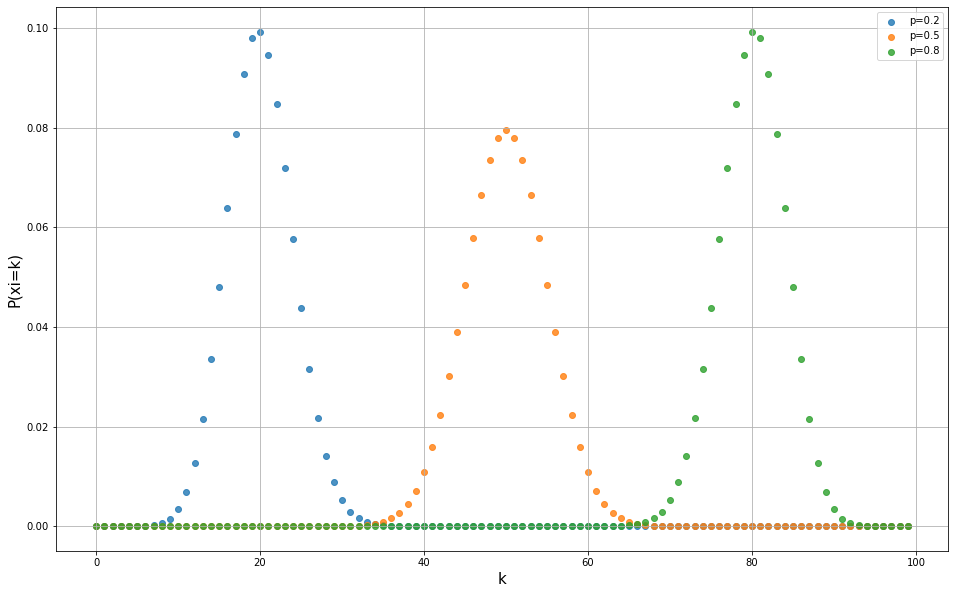

In [22]:
n = 100

plt.figure(figsize=(16,10))
for p in [0.2, 0.5, 0.8]:
    sns.regplot([i for i in range(n)], 
                [comb(n,k)*np.power(p, k)*np.power(1-p, n-k) for k in range(n)],
                fit_reg=False,
               label=f"p={p}")

plt.grid()
plt.legend()
plt.xlabel("k", fontsize=15); plt.ylabel("P(xi=k)", 
                                         fontsize=15);

#### Independence of random variables
Are defined similarly:
- for the events we had $\mathbb{P}(A\cap B) = \mathbb{P}(A)\mathbb{P}(B)$.
- Now, for random variables:

... $\mathbb{P}(\xi=x, \eta=y)=\mathbb{P}(\xi=x)\mathbb{P}(\eta=y)$ for all relevant $x$ and $y$.

### What are some (numerical) properties of random variables?
**Intuitively:** "mean value" and "spread".

#### Mathematical expectation (sometimes "mean")
If $\xi$ takes values $x_i$ with probs $p_i$, then define:

$$\mathbb{E}\xi := \sum_i x_i p_i\nonumber.$$

Does it always exist?

Well, **no.** Imagine $\xi=1,2,3,\ldots$ and $\mathbb{P}(\xi=x)=6/(\pi^2 x^2)$. What is this?
Apparently, an okay random variable:

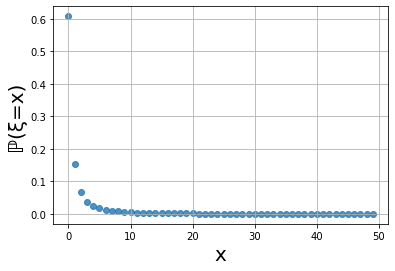

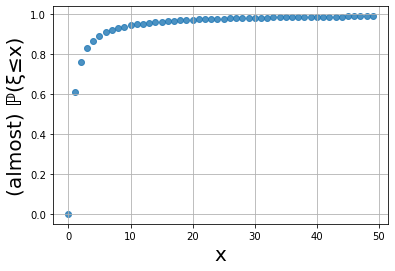

In [29]:
plt.figure()
_ = show_p(p_func=lambda x: 6/((pi**2)*(x**2)), N0=1)

plt.figure()
_ = show_cumulative_p(p_func=lambda x: 6/((pi**2)*(x**2)), p0=0)

However, if I'd want to calculate the sum $\sum_{x=1}^N x 6/(\pi^2 x^2)=\sum_{x=1}^N 6/(\pi^2 x)$, as $N$ grows I, of course will hit the wall:

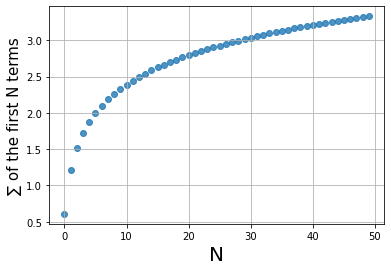

In [36]:
N = 50
S = [0.0] * N

S[0] = 6/(pi**2)

for x in range(1, N):
    S[x] = S[x-1] + 6/(x*pi**2)

sns.regplot([x for x in range(N)],S, fit_reg=False)
plt.grid()
plt.xlabel("N", fontsize=20); plt.ylabel("∑ of the first N terms", 
                                         fontsize=15);

#### Mathematical expectation.
If $\xi$ takes values $x_i$ w/prob $p_i$, define:

$$\mathbb{E}\xi := \sum_i x_i p_i\nonumber.$$

Does it always exist? -- No, but it is still **very** useful.

**A couple of important properties:** 
- expectation is *linear* -- for (any) random variables $\xi$ and $\eta$, and (any, non-random) numbers $a,b$:
$$\mathbb{E}[a\xi + b\eta]=a\mathbb{E}\xi + b\mathbb{E}\eta.\nonumber$$
- if $\xi$, $\eta$ -- independent, then $\mathbb{E}[\xi\eta]=\mathbb{E}\xi\mathbb{E}\eta$.

**Let's calculate expectation for $n$ trials of the Bernoulli scheme**.

*how?*

- for one trial -- obviously, it is $p$. 
- for a sum  $n$ such things -- $np$.

#### Variance.

$$\textrm{Var}\xi := \mathbb{E}(\xi - E\xi)^2 = \mathbb{E}\xi^2 - (\mathbb{E}\xi)^2\nonumber$$

Quite often people discuss **standard deviation** $\sigma := \sqrt{D\xi}$.

Among the important properties:
- $\textrm{Var}[c\xi] = c^2\textrm{Var}\xi$
- $\textrm{Var}[\xi + c] = \textrm{Var}\xi$
- if $\xi,\eta$ -- independent, then $\textrm{Var}[\xi+\eta]=D\xi+D\eta$.

**Let's calculate variance for $n$ trials of the Bernoulli scheme**, again

*how?*

- for one term -- obviously, $p(1-p)$. For a sum of $n$: it is $np(1-p)$.

In [37]:
## Let's see numerically.
def make_bernoulli_trial(n, p):
    """Performs one experiment (``n`` trials)."""
    outcome = [ 1*(np.random.random() <= p) for _ in range(n) ]
    return np.sum(outcome)

n = 50
p = 0.3

N=1000

k = [ make_bernoulli_trial(n, p) for _ in range(N) ]

def draw_figure():
    plt.figure(figsize=(16,10))
    ax = sns.regplot([i for i in range(N)], k, fit_reg=False)
    plt.grid()
    plt.xlabel("Experiment", fontsize=15); plt.ylabel("result (k)", 
                                             fontsize=15);
    plt.axhline(n*p,color='green', linewidth=5)
    ax.text(0, n*p+0.3, "np", fontsize=15, color='green')

    plt.axhline(n*p - sqrt(n*p*(1-p)), color='red', ls='solid')
    ax.text(0, n*p - sqrt(n*p*(1-p))+0.3, "-sigma", fontsize=15, color='red')
    plt.axhline(n*p + sqrt(n*p*(1-p)), color='red', ls='solid')
    ax.text(0, n*p + sqrt(n*p*(1-p))+0.3, "+sigma", fontsize=15, color='red')

    plt.axhline(n*p - 2*sqrt(n*p*(1-p)), color='red', ls='dashed')
    ax.text(0, n*p - 2*sqrt(n*p*(1-p))+0.3, "-2sigma", fontsize=15, color='red')
    plt.axhline(n*p + 2*sqrt(n*p*(1-p)), color='red', ls='dashed')
    ax.text(0, n*p + 2*sqrt(n*p*(1-p))+0.3, "+2sigma", fontsize=15, color='red')

    plt.axhline(n*p - 3*sqrt(n*p*(1-p)), color='red', ls='dotted')
    plt.axhline(n*p + 3*sqrt(n*p*(1-p)), color='red', ls='dotted')

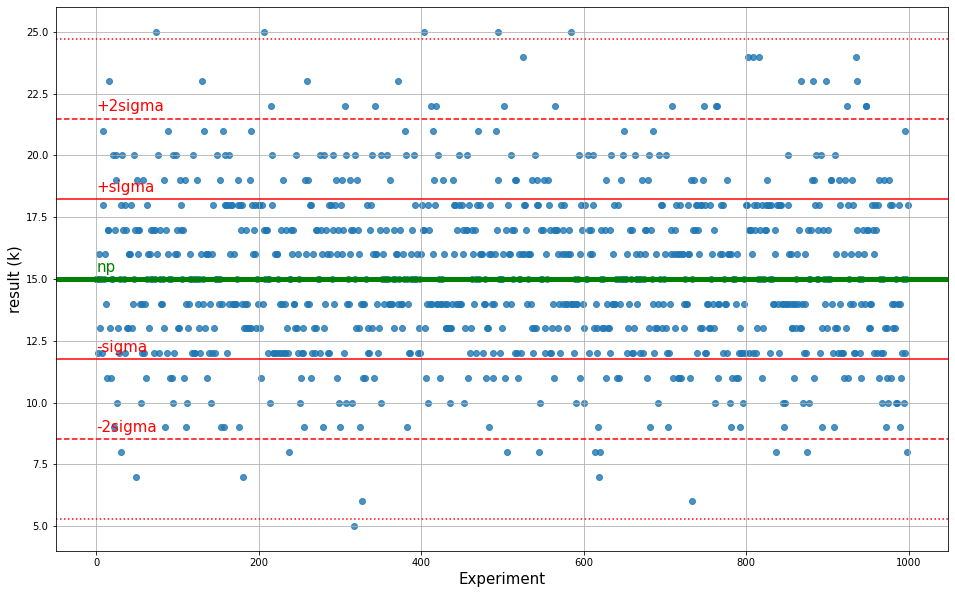

In [38]:
draw_figure()

Such figure can be used quite literally:

In [40]:
class ProductionLine:
    def __init__(self, p1, p2, n, t_star = np.random.randint(90, 110)):
        self.p1 = p1
        self.p2 = p2
        self.n = n
        self.t_star = t_star
        self.t = 0
        self.ts = [0]
        self.res = [0]
        self.p = p1
        
    def step(self):
        self.t += 1
        if self.t == self.t_star:
            print("click")
            self.p = self.p2
        return make_bernoulli_trial(self.n, self.p)
    
    def refresh(self, by=10):
        for _ in range(by):
            self.res.append(self.step())
            self.ts.append(self.t)

        np = self.n*self.p1
        sigma = sqrt(self.n*self.p1*(1-self.p1))
        
        plt.figure(figsize=(16,10))
        ax = sns.regplot(self.ts, self.res, fit_reg=False)
        plt.grid()
        plt.xlabel("Batch number", fontsize=15); plt.ylabel("Defects (number)", 
                                                 fontsize=15);
        plt.axhline(np,color='green', linewidth=5)
        ax.text(0, np+0.3, "np", fontsize=15, color='green')

        plt.axhline(np - sigma, color='red', ls='solid')
        ax.text(0, np - sigma+0.3, "-sigma", fontsize=15, color='red')
        plt.axhline(np + sigma, color='red', ls='solid')
        ax.text(0, np + sigma + 0.3, "+sigma", fontsize=15, color='red')

        plt.axhline(np - 2*sigma, color='red', ls='dashed')
        ax.text(0, np - 2*sigma+0.3, "-2sigma", fontsize=15, color='red')
        plt.axhline(np + 2*sigma, color='red', ls='dashed')
        ax.text(0, np + 2*sigma+0.3, "+2sigma", fontsize=15, color='red')

        plt.axhline(np - 3*sigma, color='red', ls='dotted')
        plt.axhline(np + 3*sigma, color='red', ls='dotted')
        plt.xlim(0,200)
        plt.ylim(np - 3.5*sigma, np + 3.5*sigma)

In [41]:
n = 1000; p=0.01; p_bad=0.013
pline = ProductionLine(p, p_bad, n)

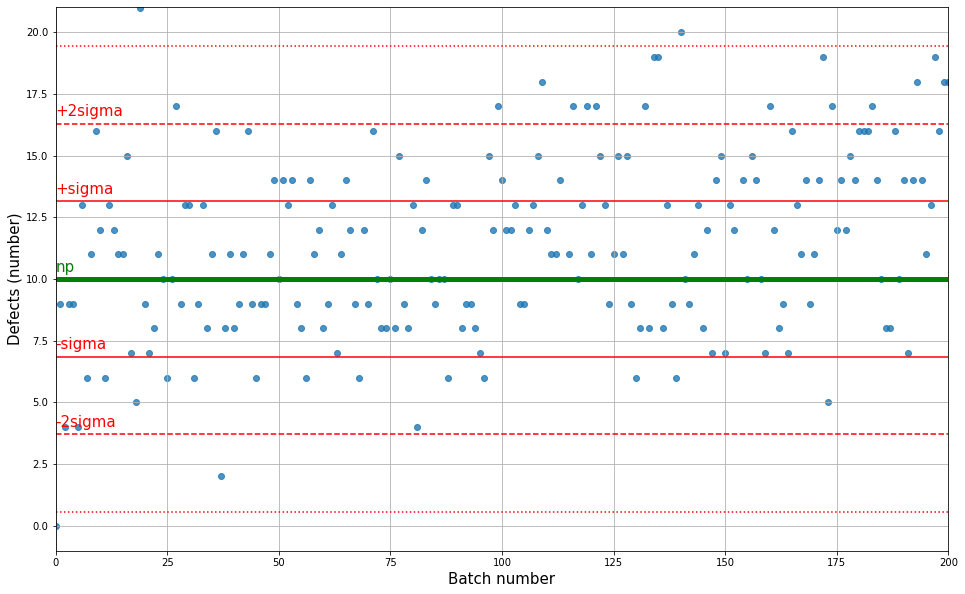

In [61]:
pline.refresh()

In [62]:
pline.t_star

108

Let's maybe develop the idea a little further?

Assume I have just thrown a coin 100 times, and I got HEADS 80 times.

**A question:** is everything OK with the coin?

Well, we can *assume* that the coin is fair, and calculate the probability to get what we got (or even more extreme). Usually it is formulated as follows:
- **Hypothesis 0 ($H_0$):** $p=0.5$.
- define a "reasonable" threshold $\alpha$ -- "confidence level". Say, 1%. Maybe five percent.
- Calculate the probability to get such, or even "more extreme" outcome -- this is called [p-value](https://en.wikipedia.org/wiki/P-value).

Now, if p-value < $\alpha$ -- then the data contradict the hypothesis, so we might want to reject it. Let's see:

for our case with the coin, p-value=$\sum_{k=80}^{100} C_n^k p^k(1-p)^n-k$, where $n=100$, $p=0.5$. That is:

In [63]:
def P(n,k,p):
    return comb(n,k)*np.power(p, k)*np.power(1-p, n-k)

pval = sum([ P(n=100, k=k, p=0.5) for k in range(80,100 + 1)])
print(f"p-value for k=80: {pval}")

pval = sum([ P(n=100, k=k, p=0.5) for k in range(60,100 + 1)])
print(f"p-value for k=60: {pval}")

p-value for k=80: 5.579544528625975e-10
p-value for k=60: 0.028443966820490385


(Calculating this directly is cool, but sometimes expensive computationally. So people quite often try to "shortcut".)

*SMTB-2021 :: "A Practical Intro to Probability Theory."*
*a@bochkarev.io*

# Topic 3: Random variables
- Definition
- Quick examples: score on dice; an RV with countably many values (Poisson)
- Bernoulli scheme (a "biased" coin) and Binomial distribution (counting the number of "Heads").
- PMF, CDF.

## Next time: random variables -- continuous case
   - Motivation: a random variable that "can be anything"
   - A histogram.
   - PDF, CDF.
   - Examples: uniform, normal random variables.
   - A numerical illustration for Central Limit Theorem.

   
**Thinking with 🍵:** make sure you understand the definition of mean and variance!